In [63]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [65]:
data = pd.read_csv('/Users/sosa/Documents/gasPriceData/gasPriceDiff.csv', delimiter = ',')
data.head()

,Year,State,gasPriceAfterFeb24,gasPriceBeforeFeb24,gasPriceDiff,is2022
0,2004,California,2.156,2.075,0.081,0
1,2004,Colorado,1.631,1.612,0.019,0
2,2004,Florida,1.749,1.728,0.021,0
3,2004,Massachussettes,1.729,1.712,0.017,0
4,2004,Minnesota,1.703,1.660,0.043,0


In [66]:
matrix = np.array(data.values)
print(matrix)

[[2004 'California' 2.156 2.075 0.081 0]
 [2004 'Colorado' 1.631 1.612 0.019 0]
 [2004 'Florida' 1.749 1.728 0.021 0]
 ...
 [2022 'Ohio' 3.394 3.436 -0.042 1]
 [2022 'Texas' 3.355 3.273 0.082 1]
 [2022 'Washington' 3.966 3.947 0.019 1]]


In [6]:
x = matrix[:,5]
y = matrix[:,4]

In [59]:
X = data.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

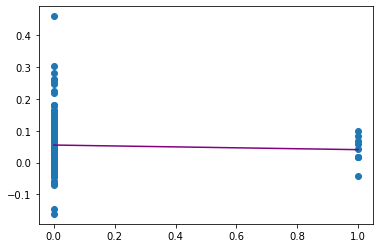

In [70]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='purple')
plt.show()

In [71]:
df = pd.DataFrame(data) 

x = df['is2022']
y = df['gasPriceDiff']

y = sm.add_constant(y)

model = sm.OLS(x, y).fit()
predictions = model.predict(y) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 is2022   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2848
Date:                Tue, 09 Aug 2022   Prob (F-statistic):              0.594
Time:                        14:13:20   Log-Likelihood:                 13.878
No. Observations:                 171   AIC:                            -23.76
Df Residuals:                     169   BIC:                            -17.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0589      0.021      2.829   